In [172]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [150]:
df = pd.read_csv('cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [151]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [152]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [153]:
df.columns = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

In [154]:
df = df.replace({1: 0, 2: 1})

In [155]:
mapping = {'M': 1, 'F': 0}
df["GENDER"] = df['GENDER'].map(mapping)

In [156]:
mapping2 = {'YES': 1, "NO": 0}
df['LUNG_CANCER'] = df['LUNG_CANCER'].map(mapping2)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


In [157]:
df.describe()
# all of the predictor columns are now int

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [167]:
def fit_models(data, target_column):
    y = data[target_column]
    X = data.drop(columns=[target_column])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)
    
    predictors = X.columns.tolist()
    
    results = []
    
    for i in range(1, len(predictors) + 1):
        for combo in combinations(predictors, i):
            X_train_subset = X_train[list(combo)]
            X_test_subset = X_test[list(combo)]
            
            model = LogisticRegression(solver = 'liblinear', random_state = 24)
            model.fit(X_train_subset, y_train)
            y_pred = model.predict(X_test_subset)
            
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)
            
            
            results.append({'Combination': ', '.join(combo),
                'Number of Predictors': len(combo),
                'ROC_AUC': roc_auc,
                'Accuracy': accuracy,
                'F1 Score': f1})

    results_sorted = sorted(results, key = lambda x: x['F1 Score'], reverse = True)
    
    return results_sorted

In [168]:
# # run once (takes about 2 mins)
# result = fit_models(df, 'LUNG_CANCER')
# print('best model:', result[0])

best model: {'Combination': 'AGE, SMOKING, PEER_PRESSURE, CHRONIC DISEASE, FATIGUE, ALLERGY, WHEEZING, ALCOHOL CONSUMING, COUGHING, CHEST PAIN', 'Number of Predictors': 10, 'ROC_AUC': 0.75, 'Accuracy': 0.9193548387096774, 'F1 Score': 0.9541284403669725}


In [171]:
result_df = pd.DataFrame(result)
result_df.head(10)

,Combination,Number of Predictors,ROC_AUC,Accuracy,F1 Score
0,"AGE, SMOKING, PEER_PRESSURE, CHRONIC DISEASE, ...",10,0.75,0.919355,0.954128
1,"AGE, SMOKING, YELLOW_FINGERS, CHRONIC DISEASE,...",8,0.70,0.903226,0.945455
2,"GENDER, AGE, YELLOW_FINGERS, PEER_PRESSURE, CH...",9,0.70,0.903226,0.945455
3,"AGE, YELLOW_FINGERS, PEER_PRESSURE, CHRONIC DI...",9,0.70,0.903226,0.945455
4,"GENDER, AGE, YELLOW_FINGERS, PEER_PRESSURE, CH...",10,0.70,0.903226,0.945455
5,"GENDER, AGE, YELLOW_FINGERS, PEER_PRESSURE, CH...",10,0.70,0.903226,0.945455
6,"AGE, SMOKING, YELLOW_FINGERS, PEER_PRESSURE, C...",10,0.70,0.903226,0.945455
7,"AGE, YELLOW_FINGERS, PEER_PRESSURE, CHRONIC DI...",10,0.70,0.903226,0.945455
8,"GENDER, AGE, SMOKING, PEER_PRESSURE, CHRONIC D...",11,0.70,0.903226,0.945455
9,"GENDER, AGE, YELLOW_FINGERS, PEER_PRESSURE, CH...",11,0.70,0.903226,0.945455


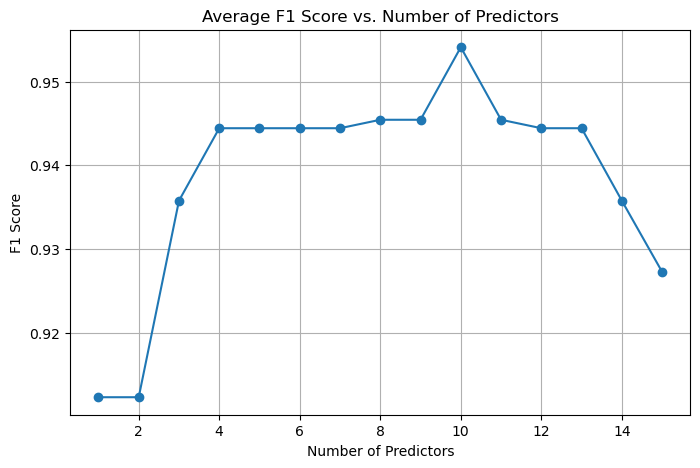

In [189]:
f1_by_predictor_count = result_df.groupby('Number of Predictors')['F1 Score'].max().reset_index()

# Plotting the aggregated data
plt.figure(figsize = (8, 5))
plt.plot(f1_by_predictor_count['Number of Predictors'], f1_by_predictor_count['F1 Score'], marker = 'o')
plt.xlabel('Number of Predictors')
plt.ylabel('F1 Score')
plt.title('Average F1 Score vs. Number of Predictors')
plt.grid(True)
plt.show()